In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('Walmart DataSet.csv')
data1['Date'] = pd.to_datetime(data1['Date'], format='%d-%m-%Y')
data1.set_index('Date', inplace=True)
# There are about 45 different stores in this dataset. Lets select the any store id from 1-45
a= int(input("Enter the store id:"))
store = data1[data1.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id: 3


Weekly_Sales    float64
dtype: object

In [3]:
sales

,Weekly_Sales
Date,
2010-02-05,461622.22
2010-02-12,420728.96
2010-02-19,421642.19
2010-02-26,407204.86
2010-03-05,415202.04
...,...
2012-09-28,389813.02
2012-10-05,443557.65
2012-10-12,410804.39


In [4]:
#remove date from index to change its dtype because it clearly isnt acceptable.
#sales.reset_index(inplace = True)
#converting 'date' column to a datetime type
#sales['Date'] = pd.to_datetime(sales['Date'])
#resetting date back to the index
#sales.set_index('Date',inplace = True)

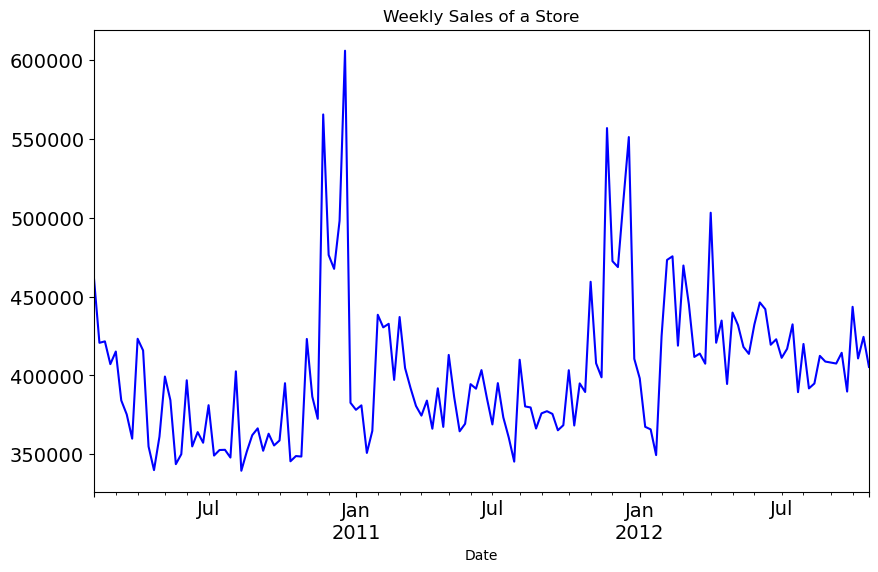

In [5]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

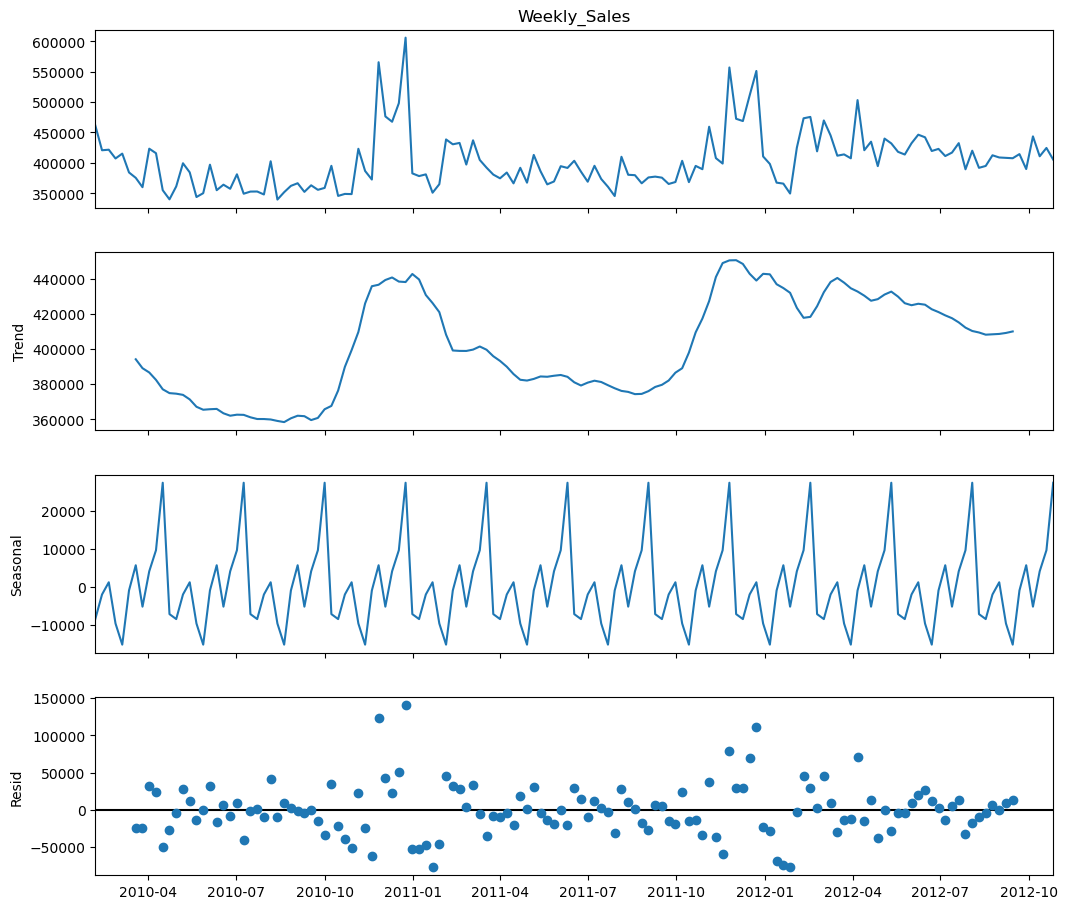

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [9]:
#lets compare the 2012 data of two stores
# Lets take store 5 data for analysis
store5 = data1[data1.Store == 5]
# there are about 45 different stores in this dataset.

sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.dtypes
# Grouped weekly sales by store 6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales5.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales5['Date'] = pd.to_datetime(sales5['Date'])
# resetting date back to the index
sales5.set_index('Date',inplace = True)

In [10]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

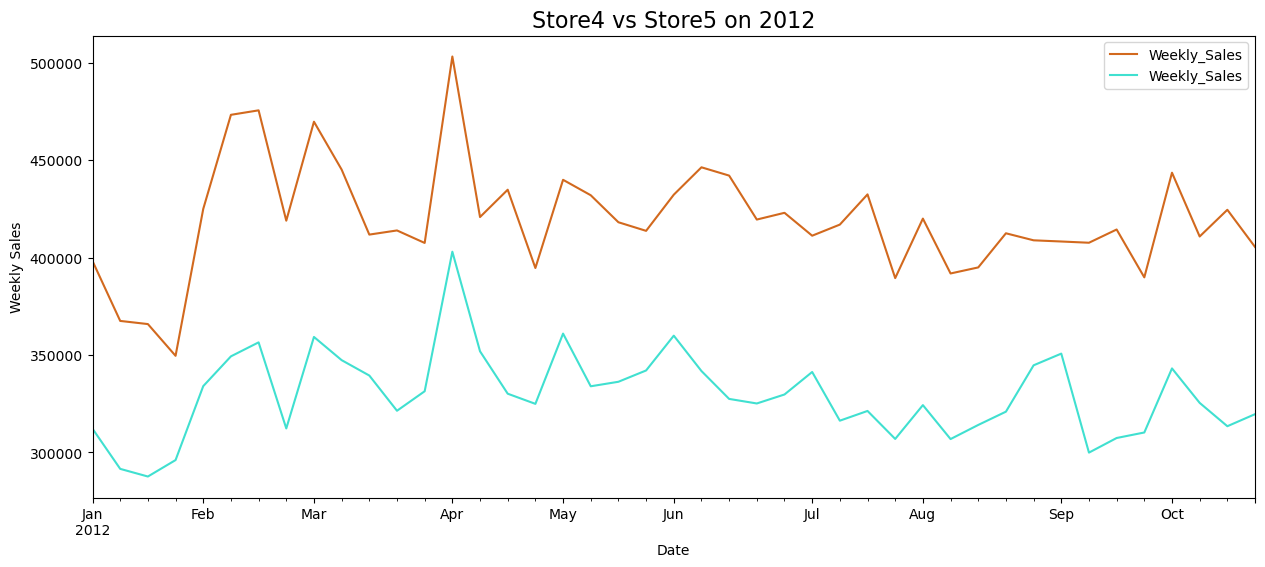

In [11]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store5 on 2012', fontsize = '16')
plt.show()

In [12]:
# Clearly we can see the irregularities 

In [13]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [14]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5960      0.919     -1.736      0.083      -3.398       0.206
ar.L2         -1.1771      0.948     -1.241      0.215      -3.036       0.682
ar.L3         -0.4891      0.726     -0.674      0.501      -1.912       0.934
ar.L4         -0.0373      0.223     -0.167      0.868      -0.475       0.401
ma.L1         -1.2287      1.012     -1.214      0.225      -3.212       0.755
ma.L2         -0.4830      1.766     -0.273      0.784      -3.944       2.978
ma.L3          0.7191      0.812      0.886      0.376      -0.871       2.310
ar.S.L52      -0.2069      0.065     -3.175      0.001      -0.335      -0.079
sigma2      1.805e+09   1.89e-09   9.55e+17      0.000     1.8e+09     1.8e+09


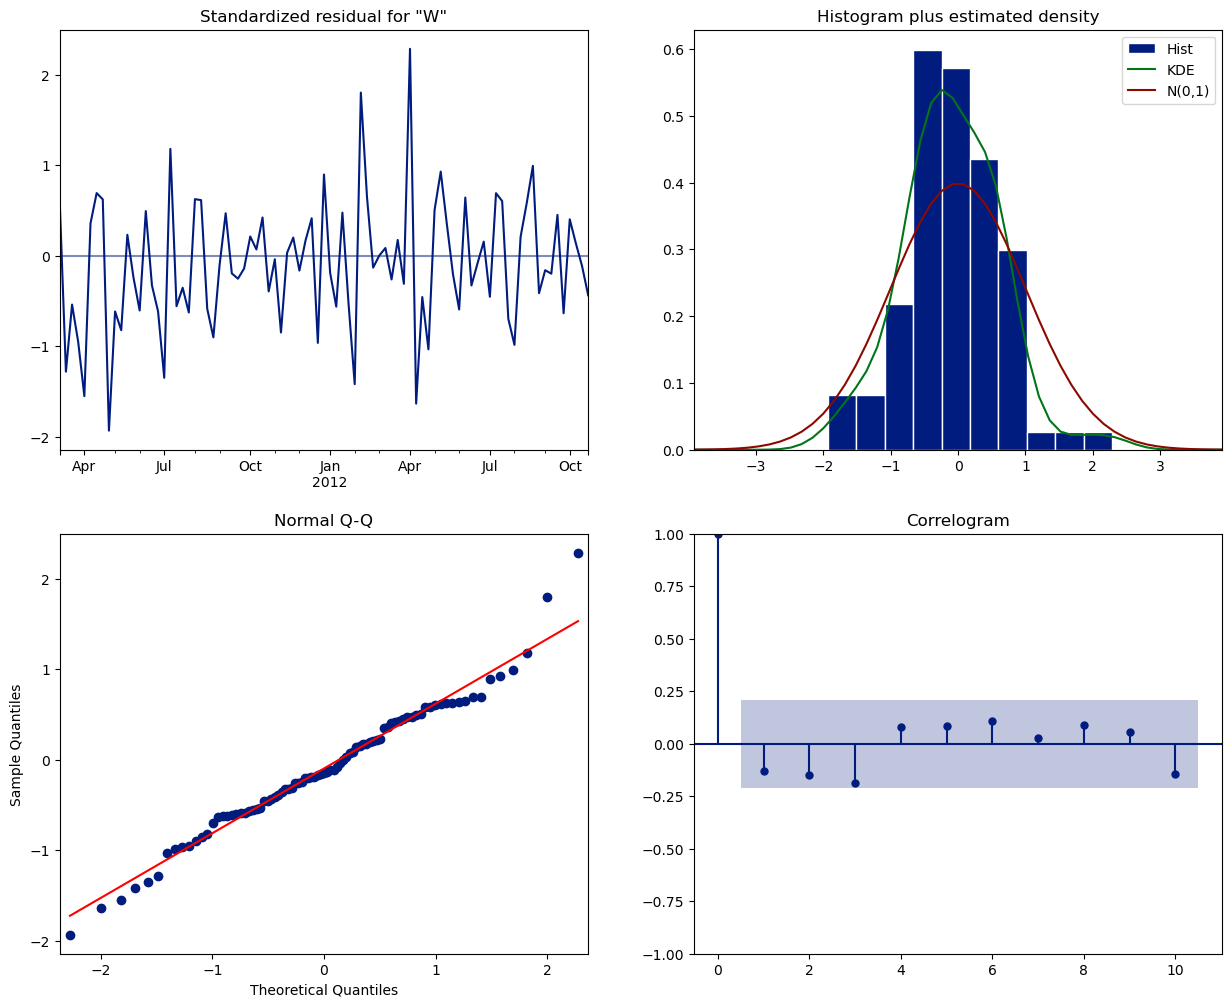

In [18]:
plt.style.use('seaborn-v0_8-dark-palette')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

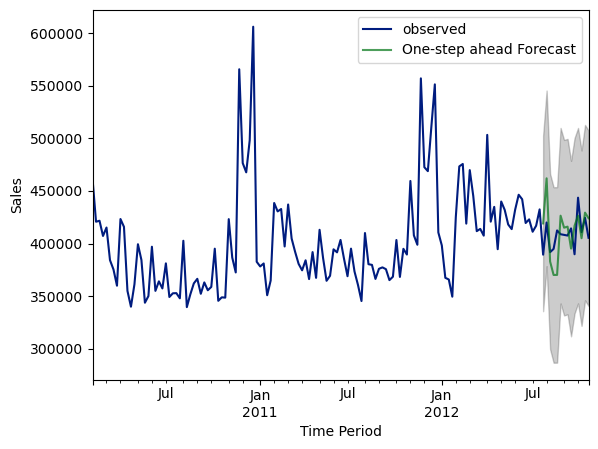

In [20]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [21]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 524849291.05


In [22]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\Users\rudra\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


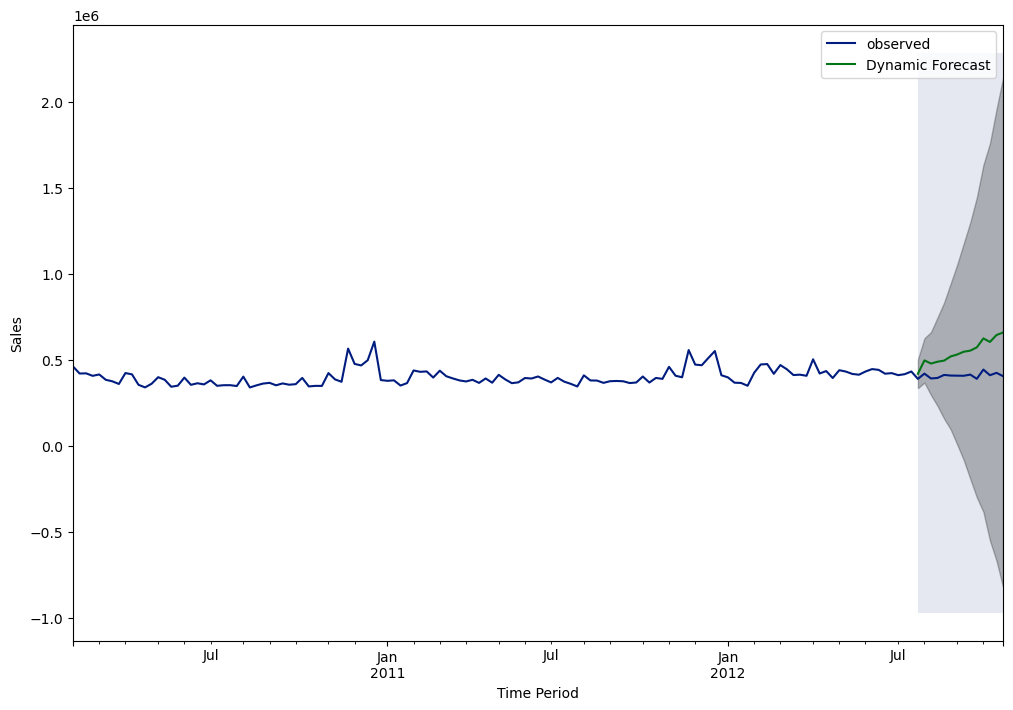

In [23]:


ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()



In [24]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

2012-07-27    419111.212659
2012-08-03    496937.681761
2012-08-10    478575.122519
2012-08-17    489283.003950
2012-08-24    495722.051599
2012-08-31    519747.865012
2012-09-07    531199.051663
2012-09-14    547249.174836
2012-09-21    553713.689550
2012-09-28    572548.644721
2012-10-05    624690.369526
2012-10-12    604263.101222
2012-10-19    644274.738059
2012-10-26    658931.708462
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [25]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-07-27    389427.90
2012-08-03    419990.29
2012-08-10    391811.60
2012-08-17    394918.83
2012-08-24    412449.67
2012-08-31    408838.73
2012-09-07    408229.73
2012-09-14    407589.16
2012-09-21    414392.09
2012-09-28    389813.02
2012-10-05    443557.65
2012-10-12    410804.39
2012-10-19    424513.08
2012-10-26    405432.70
Name: Weekly_Sales, dtype: float64


In [26]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 149449.25


In [27]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 1914478.5755394062


In [28]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

In [29]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

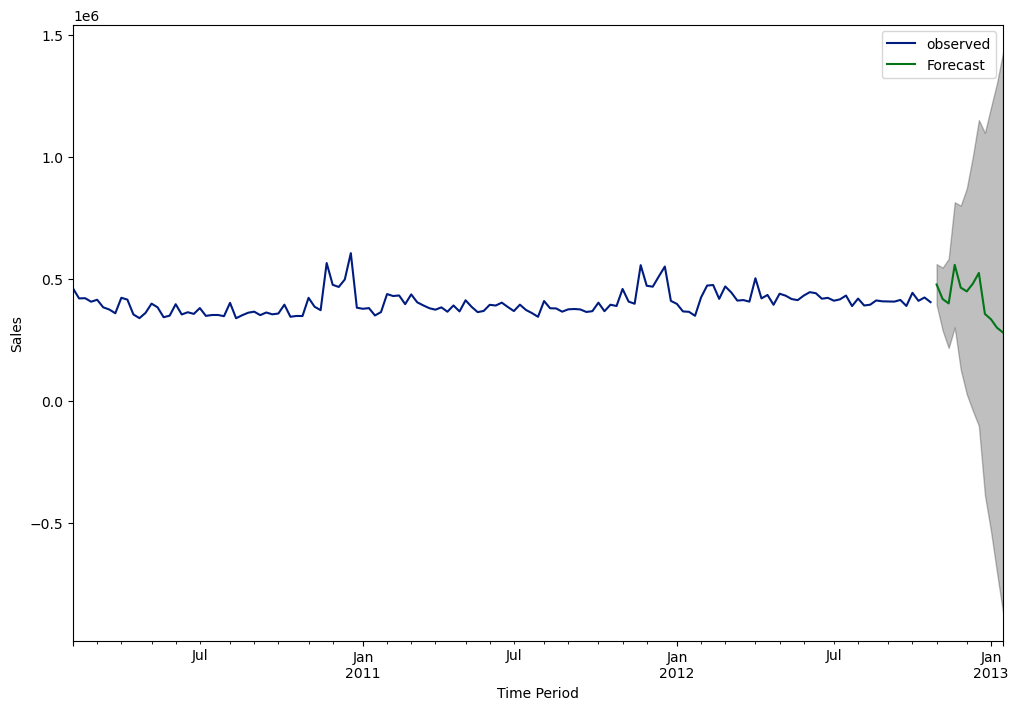

In [30]:


ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

